# DESAFIO 0

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

Quanto você sabe sobre o deslocamento do carro?
O deslocamento se refere ao volume de gás sugado ou descarregado por curso do pistão. O volume de gás produzido pelo pistão movendo-se do ponto mais alto para o ponto mais baixo torna-se o deslocamento do cilindro; se o motor tem vários cilindros, a soma dos volumes de gás de todos os cilindros torna-se o deslocamento do motor. Geralmente é expresso em litros (eu).

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6

import seaborn as sns

In [ ]:
df_auto = pd.read_csv('auto_industry.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
print(f'Número de linhas {df_auto.shape[0]}')
print(f'Número de colunas {df_auto.shape[1]}')

Número de linhas 398
Número de colunas 9


In [ ]:
df_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
df_auto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [ ]:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
# DADOS FALTANTES EM %
(df_auto.isnull().sum() / len(df_auto) * 100).round(2)

mpg             0.00
cylinders       0.00
displacement    0.00
horsepower      1.51
weight          0.00
acceleration    0.00
model_year      0.00
origin          0.00
name            0.00
dtype: float64

In [ ]:
filtro = df_auto.horsepower.isnull()
df_auto.loc[filtro]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
replace_null= df_auto.groupby(by=['model_year', 'cylinders']).horsepower.mean().to_dict()

In [ ]:
horsepower_bcp = df_auto['horsepower'].values

In [ ]:
df_auto['horsepower'] = df_auto.apply(lambda df: replace_null[(df['model_year'], df['cylinders'])] if math.isnan(df['horsepower']) else df['horsepower'], axis = 1)

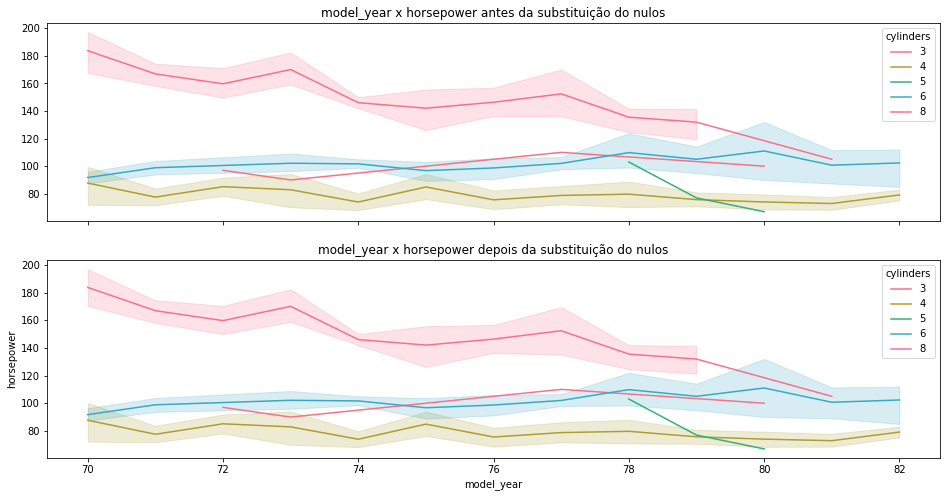

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
ax[0].set_title('model_year x horsepower antes da substituição do nulos')
sns.lineplot(data = df_auto, x = 'model_year', y = horsepower_bcp, hue='cylinders', palette='husl', ax = ax[0])

ax[1].set_title('model_year x horsepower depois da substituição do nulos')
sns.lineplot(data = df_auto, x = 'model_year', y = 'horsepower', hue='cylinders', palette='husl', ax = ax[1])
plt.show()

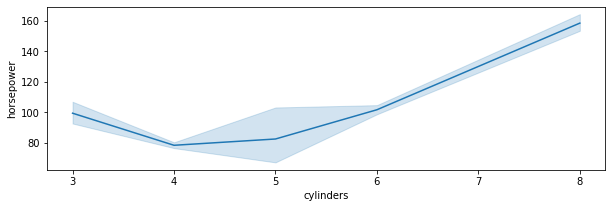

In [ ]:
plt.figure(figsize=(10, 3))
sns.lineplot(data = df_auto, x = 'cylinders', y = 'horsepower');

## Calcule quantos modelos foram lançados em anos pares

In [ ]:
filtro = df_auto['model_year'] % 2 == 0
df_auto.loc[filtro].groupby('model_year').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
model_year,,,,,,,,
70,29,29,29,29,29,29,29,29
72,28,28,28,28,28,28,28,28
74,27,27,27,27,27,27,27,27
76,34,34,34,34,34,34,34,34
78,36,36,36,36,36,36,36,36
80,29,29,29,29,29,29,29,29
82,31,31,31,31,31,31,31,31


## Crie uma coluna para a marca do veículo e outra para o nome

In [ ]:
df_auto.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
136,16.0,8,302.0,140.0,4141,14.0,74,usa,ford gran torino


In [ ]:
df_auto['marca'] = df_auto.apply(lambda cols: cols['name'].split(' ')[0], axis=1)
df_auto['modelo'] = df_auto.name.map(lambda x: ' '.join(x.split(' ')[1:]))
df_auto.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca,modelo
209,19.0,4,120.0,88.0,3270,21.9,76,europe,peugeot 504,peugeot,504


## É posível identificar alguma relação entre mpg e acceleration?

In [ ]:
df_auto[['mpg', 'acceleration']].corr()

,mpg,acceleration
mpg,1.000000,0.420289
acceleration,0.420289,1.000000


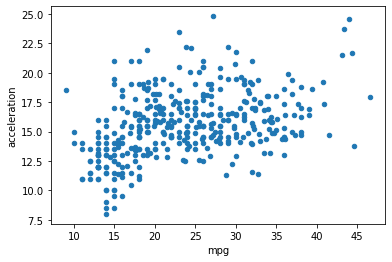

In [ ]:
df_auto.plot(x='mpg', y='acceleration', kind='scatter');

## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [ ]:
df_usa = df_auto.groupby('origin').get_group('usa')

## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [ ]:
df_em_kml = df_auto.drop_duplicates()

In [ ]:
df_em_kml['km_l'] = df_em_kml['mpg'] * 0.425144

In [ ]:
df_em_kml['origin'] = df_auto.origin.str.title()

In [ ]:
df_em_kml.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca,modelo,km_l
288,18.2,8,318.0,135.0,3830,15.2,79,Usa,dodge st. regis,dodge,st. regis,7.737621


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [ ]:
test = df_em_kml.pivot_table(index = ['model_year', 'cylinders'], values = ['mpg'], aggfunc='mean')

NameError: ignored

In [ ]:
df_em_kml.pivot_table(index = ['model_year', 'cylinders'], values = ['mpg'], aggfunc='mean')

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [ ]:
df_em_kml.groupby(['origin', 'cylinders']).horsepower.mean()

origin  cylinders
Europe  4             78.158627
        5             82.333333
        6            113.500000
Japan   3             99.250000
        4             75.579710
        6            115.833333
Usa     4             80.788541
        6             99.698198
        8            158.300971
Name: horsepower, dtype: float64

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [ ]:
df_em_kml['origin'].values

array(['Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Japan', 'Usa', 'Usa', 'Usa',
       'Japan', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Japan', 'Usa', 'Japan', 'Usa', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Europe',
       'Europe', 'Europe', 'Japan', 'Japan', 'Europe', 'Usa', 'Japan',
       'Usa', 'Europe', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Japan', 'Usa', 'Usa', 'Usa', 'Usa',
       'Europe', 'Europe', 'Europe', 'Europe', 'Usa', 'Japan', 'Japan',
       'Usa', 'Japan', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa',
       'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa',
       'Usa', 'Europe', 'Usa', 'Usa', 'Usa', 'Usa', 'Usa', 'Japan', 'Usa',
       'Japan', 'Japan', 'Usa', 'Usa', 'Europe', 'Usa', 'Usa', 'Europe

# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis

In [ ]:
df_em_kml.agg(func=['mean', 'median', 'std', 'skew']).T.round(3)

NameError: ignored

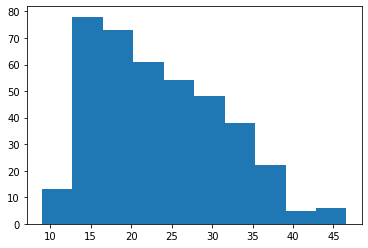

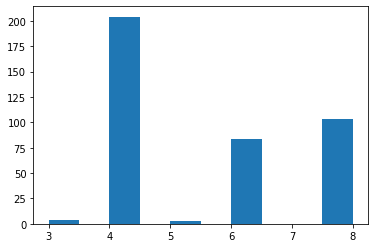

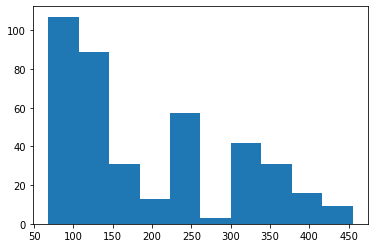

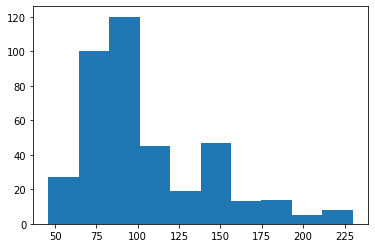

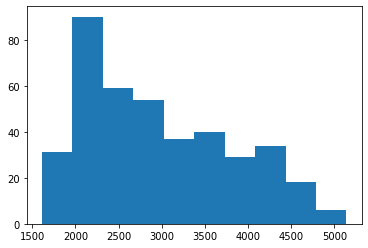

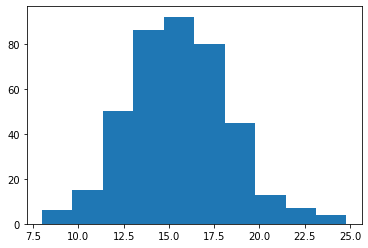

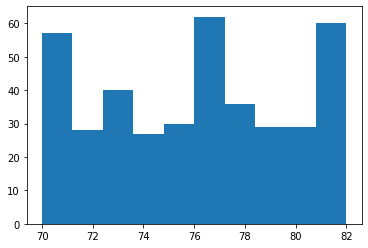

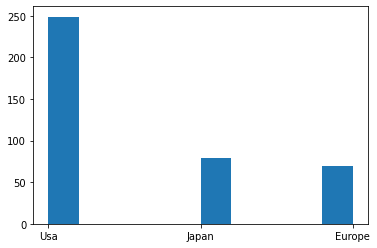

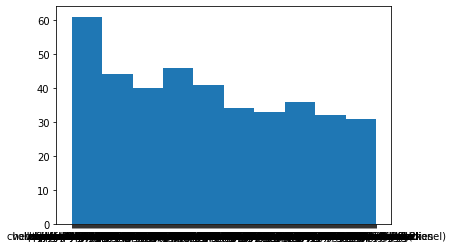

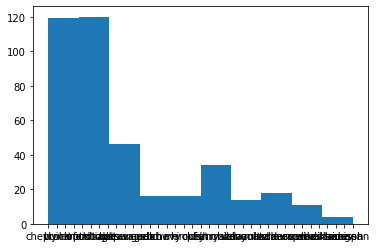

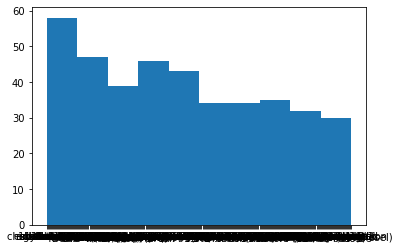

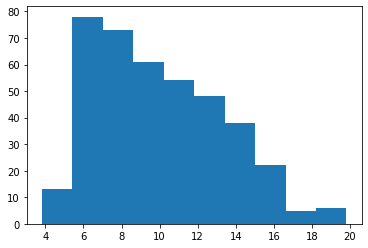

In [ ]:
for coluna in df_em_kml.columns:
  plt.hist(df_em_kml[coluna])
  plt.show()

## Gere um gráfico para mostrar a relação entre cada par de variável numérica.

# Bonus - DataViz

## Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

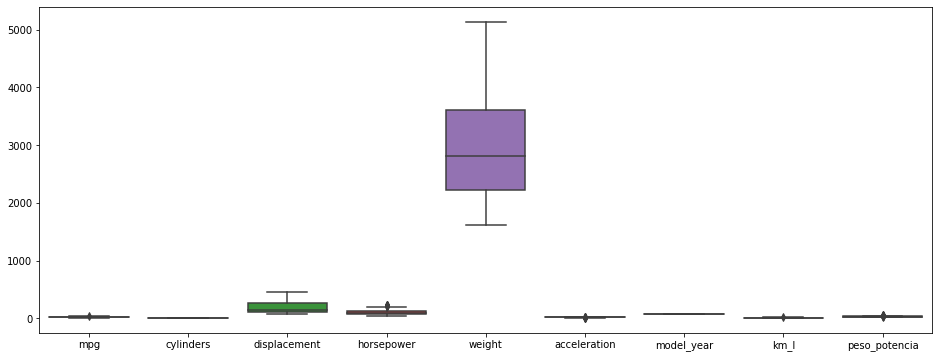

In [ ]:
## O grafico ficou distorcido por conta da escala das variaveis
plt.figure(figsize = (16, 6))
sns.boxplot(data = df_em_kml)
plt.show()

In [ ]:
def normalizar(df):
  return (df - df.min()) / (df.max() - df.min())


def padronizado(df):
  return (df - df.mean()) / df.std()

df_normalizado = normalizar(df_em_kml.select_dtypes(['int64', 'float64']))
df_padronizado = padronizado(df_em_kml.select_dtypes(['int64', 'float64']))

In [ ]:
df_normalizado = normalizar(df_em_kml.select_dtypes(['int64', 'float64']))
df_padronizado = padronizado(df_em_kml.select_dtypes(['int64', 'float64']))

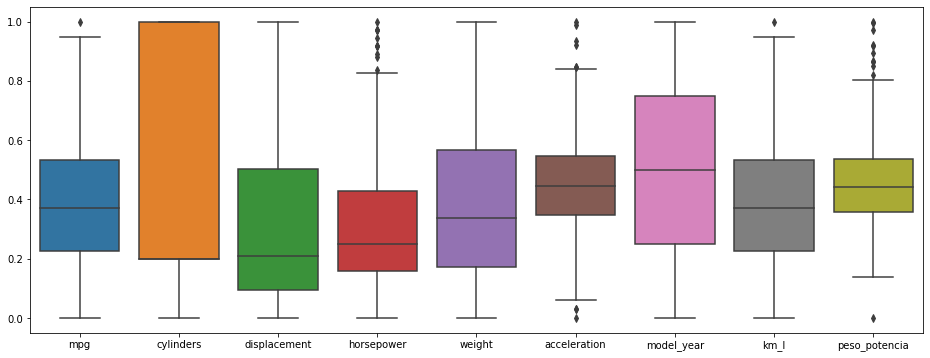

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df_normalizado);

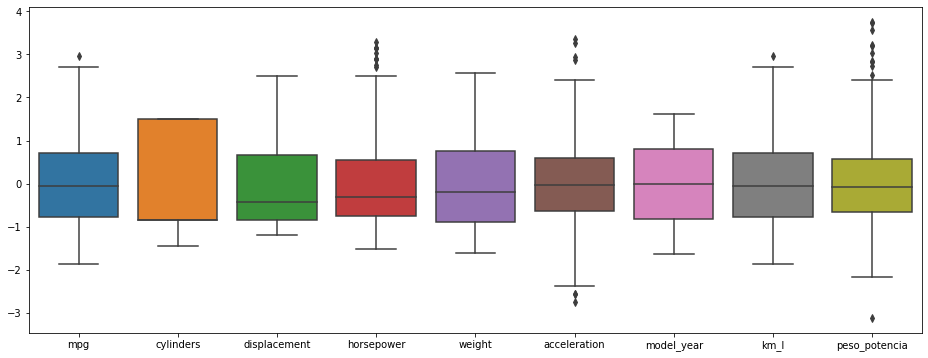

In [ ]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df_padronizado);

## Crie uma nova coluna com a relação peso/potência para cada veículo e um scatterplot dessa coluna com a de consumo que você criou 

In [ ]:
df_em_kml['peso_potencia'] = df_em_kml['weight'] / df_em_kml['horsepower']

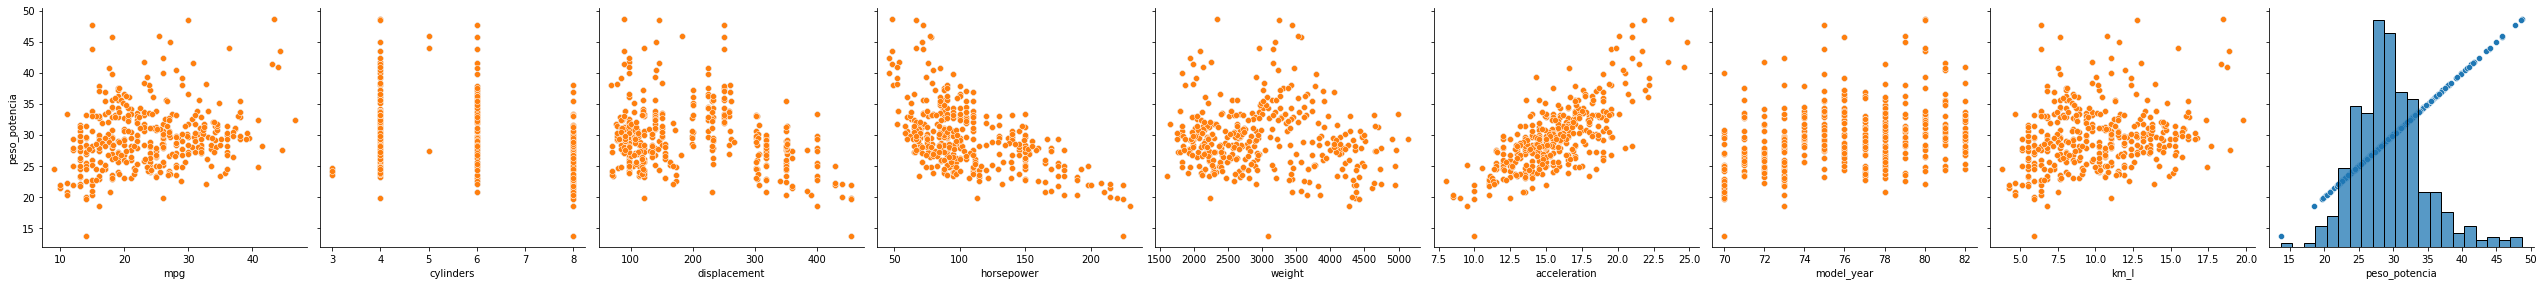

In [ ]:
g = sns.pairplot(data = df_em_kml, y_vars=['peso_potencia'], height = 4)
g.map(sns.scatterplot)
plt.show()